In [1]:
#****Task 2 & Book_Maker: 5Dimes*******


import numpy as np
import pandas as pd
from pandas import DataFrame
import csv
from matplotlib import pyplot as plt
bets=pd.read_csv('C:\\Users\\MERT\\Desktop\\Dersler\\Data Mining\\Veriler\\bets.csv')
matches=pd.read_csv('C:\\Users\\MERT\\Desktop\\Dersler\\Data Mining\\Veriler\\matches.csv')

In [2]:
Fourth_Book_Maker=bets[bets.odd_bookmakers=='5Dimes'] #fourth bookmaker is 5Dimes
Home_Win_List=Fourth_Book_Maker[Fourth_Book_Maker.variable=='odd_1'] #home, away and draft win filtered seperately
Away_Win_List=Fourth_Book_Maker[Fourth_Book_Maker.variable=='odd_2']
Draft_List=Fourth_Book_Maker[Fourth_Book_Maker.variable=='odd_x']
Premier_League=matches[matches.league_id==148]

In [3]:
data= pd.merge(Home_Win_List,Away_Win_List,on='match_id',how='inner') #firstly merge home and away win for a match
data_1=pd.merge(data,Premier_League,on='match_id',how='inner') #secondly with merge premier league match to eliminate others

In [4]:
data_2=pd.merge(data_1,Draft_List,on='match_id',how='inner') #finally draft merged to data

In [5]:
data_2['Prob_Home']=1/(data_2['value_x'])  #probability of home team win

In [6]:
data_2['Prob_Away']=1/(data_2['value_y'])  #probability of away team win

In [7]:
data_2['Prob_Draft']=1/(data_2['value'])   #probability of draft

In [8]:
Norm_Home=(data_2['Prob_Home'])/(data_2['Prob_Home']+data_2['Prob_Away']+data_2['Prob_Draft']) #normalization
Norm_Away=(data_2['Prob_Away'])/(data_2['Prob_Home']+data_2['Prob_Away']+data_2['Prob_Draft']) 
Norm_Draft=(data_2['Prob_Draft'])/(data_2['Prob_Home']+data_2['Prob_Away']+data_2['Prob_Draft'])
match_id=data_2['match_id']
norm_bet={'match_id':match_id,
         'Norm_Home':Norm_Home,
         'Norm_Away':Norm_Away,
         'Norm_Draft':Norm_Draft}


In [9]:
norm_prob= DataFrame(norm_bet,columns=['match_id','Norm_Home', 'Norm_Away', 'Norm_Draft'])
print(norm_prob)

    match_id  Norm_Home  Norm_Away  Norm_Draft
0     150842   0.691261   0.110633    0.198105
1     150843   0.587216   0.174183    0.238601
2     150844   0.713405   0.106933    0.179663
3     154513   0.318205   0.381106    0.300689
4     154516   0.693188   0.113651    0.193161
5     154517   0.147739   0.630987    0.221274
6     154518   0.078758   0.772462    0.148779
7     154519   0.347365   0.370960    0.281675
8     155388   0.276250   0.468309    0.255441
9     156200   0.334269   0.349734    0.315997
10    156849   0.378418   0.317817    0.303764
11    158697   0.322041   0.361112    0.316847
12    158699   0.092670   0.732231    0.175099
13    158538   0.079727   0.750921    0.169351
14    158539   0.636335   0.128099    0.235566
15    158541   0.175638   0.569802    0.254561
16    158542   0.410808   0.315701    0.273491
17    158543   0.714960   0.096312    0.188727
18    159175   0.153262   0.628766    0.217972
19    159177   0.326529   0.352277    0.321194
20    159180 

In [10]:
x=data_2['Prob_Home']-data_2['Prob_Away']

In [11]:
y=data_2['Prob_Draft']

Text(0.5,1,'5Dimes')

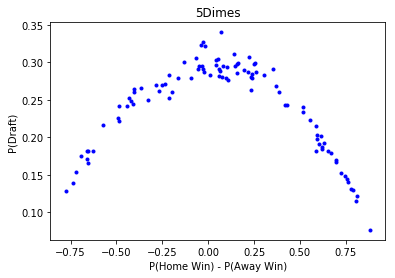

In [12]:
plt.plot(x,y,'.',color='blue')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draft)')
plt.title('5Dimes')

In [13]:
data_2['dif']=data_2['Prob_Home']-data_2['Prob_Away']

In [14]:
data_3=pd.merge(data_2,matches,on='match_id',how='inner') #merging the match score and probabilities with respect to match_id

In [15]:
draft_matches = data_3[data_3.match_hometeam_score_y == data_3.match_awayteam_score_y] #filtering only draft matches
a = np.histogram(draft_matches['dif'], bins=np.arange(-1, 1.1, 0.1))[0]  #defining bins with 0,1 and calculating the draft matches in these bins

In [16]:
b = np.histogram(data_3['dif'], bins=np.arange(-1, 1.1, 0.1))[0] #calculating all matches in these bins
for index in range(len(b)):
    if b[index]==0:                        #preventing 0/0, dont affect the result 
        b[index]=1
    

In [17]:
actual_prob_draft=np.true_divide(a, b)  #real draft match rates


Text(0.5,1,'5Dimes')

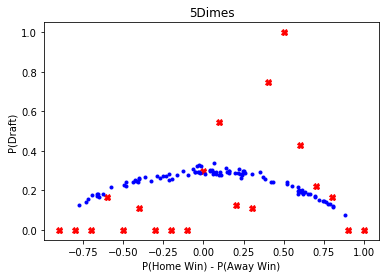

In [18]:
plt.plot(np.arange(-0.9,1.1,0.1),actual_prob_draft,'X',color='red')
plt.plot(x,y,'.',color='blue')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draft)')
plt.title('5Dimes')

In [19]:
#Comment: There is no bias in odds representing the probabilities.